In [1]:
import xarray as xr
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
infile = '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-20000501/land_month.zarr.zip'

In [3]:
ds = xr.open_dataset(infile, engine='zarr')

In [8]:
da_spatial = ds['water'].isel({'time': 0, 'ensemble': 0})

In [10]:
da_spatial

<xarray.DataArray 'water' (lat: 90, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    area        (lat, lon) float32 2.758e+08 2.758e+08 2.758e+08 ... nan nan nan
    average_DT  timedelta64[ns] 31 days
    average_T1  datetime64[ns] 2000-05-03
    average_T2  datetime64[ns] 2000-06-03
    ensemble    int64 1
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.3 353.8 356.2 358.8
    time        object 2000-05-16 12:00:00
Attributes:
    cell_methods:   time: mean
    long_name:      mass of water in bucket
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2

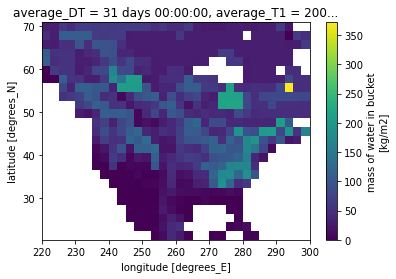

In [12]:
da_spatial.sel({'lat': slice(20, 70), 'lon': slice(220, 300)}).plot()

In [13]:
da_temporal = ds['water'].isel({'ensemble': 0})
da_temporal = da_temporal.sel({'lat': 47.45, 'lon': 237.69}, method='nearest')

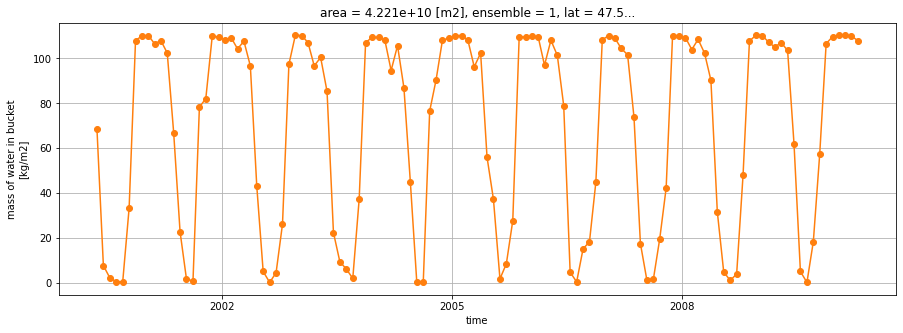

In [34]:
fig = plt.figure(figsize=[15, 5])
ax = fig.add_subplot(111)
da_temporal.plot(ax=ax, marker='o', color='tab:orange')
#da_temporal.isel({'time': slice(0, 12)}).plot(ax=ax, marker='o', color='tab:orange')
#da_temporal.isel({'time': slice(12, 24)}).plot(ax=ax, marker='o', color='tab:blue')
#da_temporal.isel({'time': slice(24, 36)}).plot(ax=ax, marker='o', color='tab:red')
#da_temporal.isel({'time': slice(36, 48)}).plot(ax=ax, marker='o', color='tab:green')
ax.grid(True)

In [2]:
summer_water_file = '/g/data/xv83/dbi599/seatac/data/water_cafe-c5-d60-pX-f6_19950501-20201101_JJA-mean_seatac.zarr.zip'
ds_summer_water = xr.open_dataset(summer_water_file, engine='zarr')

In [3]:
ds_summer_water

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 52, lead_time: 10)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-16 00:00:00 ... 2020-11-16 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object ...
Data variables:
    water      (init_date, lead_time, ensemble) float64 ...
Attributes:
    filename:   land_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Oct 19 14:58:36 2022: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

The first lead time for May starts comes from an incomplete year (and needs to be removed) and the last lead time from Nov starts.

In [6]:
ds_summer_water_may = ds_summer_water.sel({'init_date': ds_summer_water['init_date'].dt.month == 5})
ds_summer_water_may = ds_summer_water_may.isel({'lead_time': slice(1, 10)})
ds_summer_water_may

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-16 00:00:00 ... 2020-05-16 00:00:00
  * lead_time  (lead_time) int64 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object 1996-05-16 12:00:00 ... 2029-05-...
Data variables:
    water      (init_date, lead_time, ensemble) float64 21.22 20.18 ... 21.85
Attributes:
    filename:   land_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Oct 19 14:58:36 2022: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

In [7]:
txx_file = '/g/data/xv83/dbi599/seatac/data/tasmax_cafe-c5-d60-pX-f6_19950501-20201101_A-DEC-max_seatac.zarr.zip'
ds_txx = xr.open_dataset(txx_file, engine='zarr')

In [8]:
ds_txx_may = ds_txx.sel({'init_date': ds_summer_water['init_date'].dt.month == 5})
ds_txx_may

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-01 00:00:00 ... 2020-05-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) object ...
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 ...
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Thu Dec 02 16:08:28 2021: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

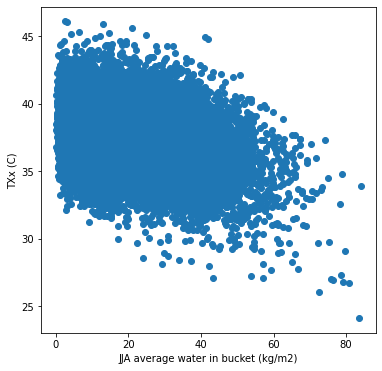

In [22]:
fig = plt.figure(figsize=[6, 6])
plt.scatter(ds_summer_water_may['water'].values.flatten(), ds_txx_may['tasmax'].values.flatten())
plt.ylabel('TXx (C)')
plt.xlabel('JJA average water in bucket (kg/m2)')
plt.show()